In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf


In [2]:
filename = "../baseline/baseline_v3.4_10yrs.db"
name = os.path.basename(filename).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [4]:
bundle_list = []

# col here could be anything
metric = maf.metrics.AccumulateCountMetric(col=['night'], metric_name='Nvis', bins=np.arange(0,3652+365, 365))
# Select all the visits. Could do something like 'filter="r"' 
sql = ''
slicer = maf.slicers.HealpixSlicer()
plot_dict = {'color_max': 950}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict))


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [5]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, filename, out_dir=out_dir, results_db=results_db)
bg.run_all()
#bg.plot_all(closefigs=False)

TypeError: bad number of pixels

<Figure size 640x480 with 0 Axes>

In [6]:
mv = bundle_list[0].metric_values

/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


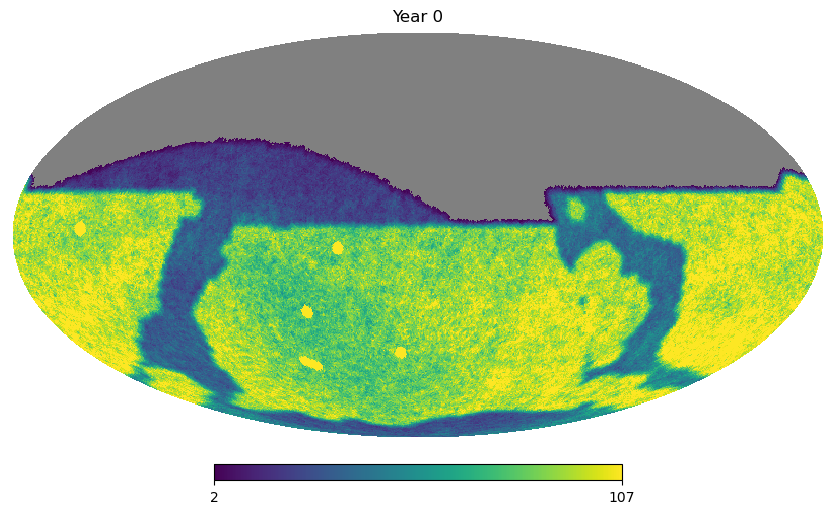

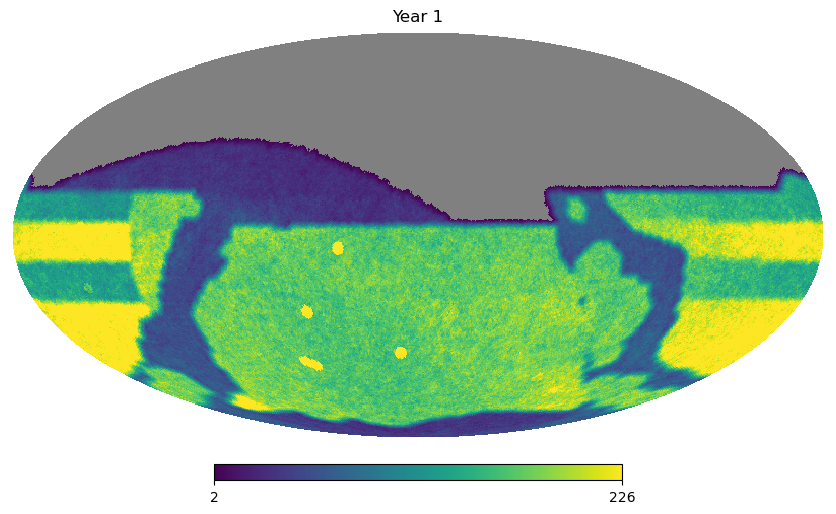

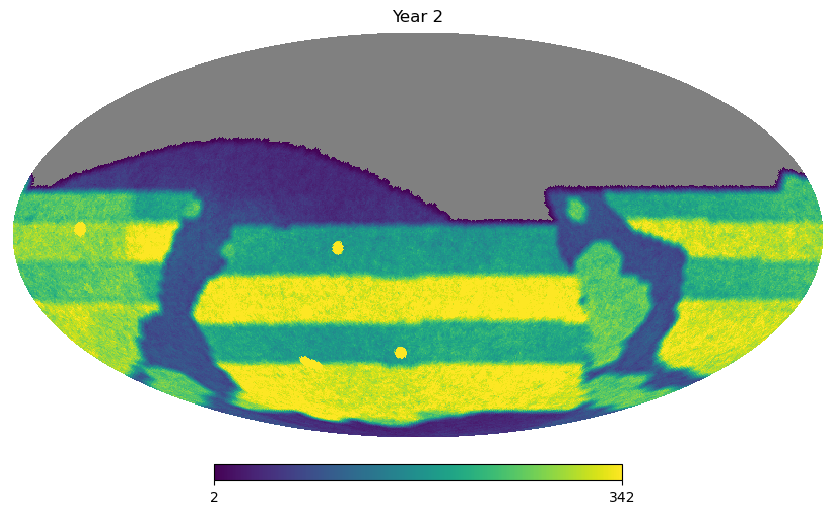

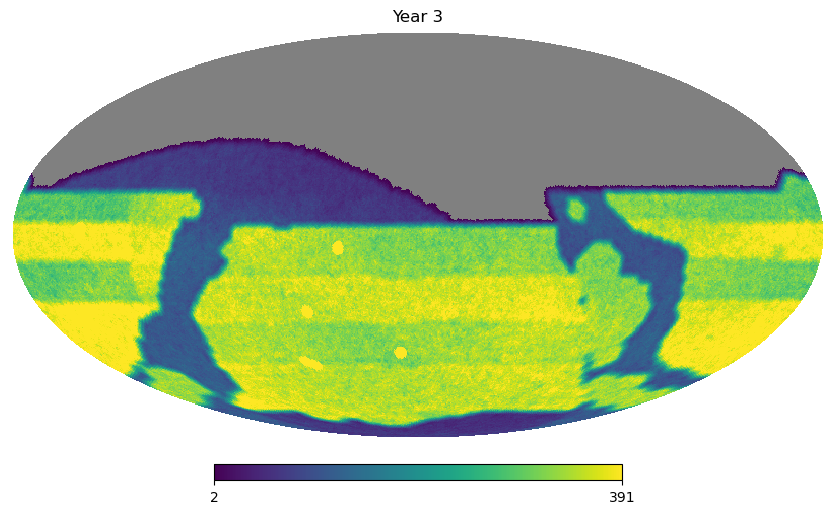

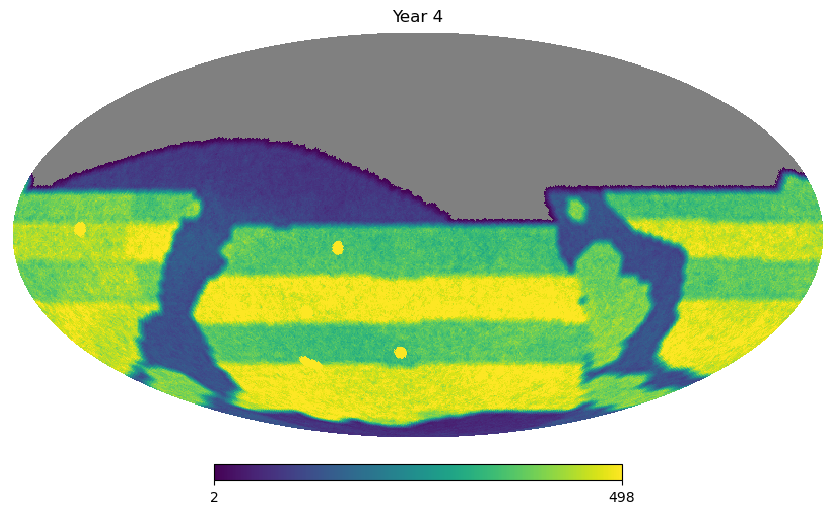

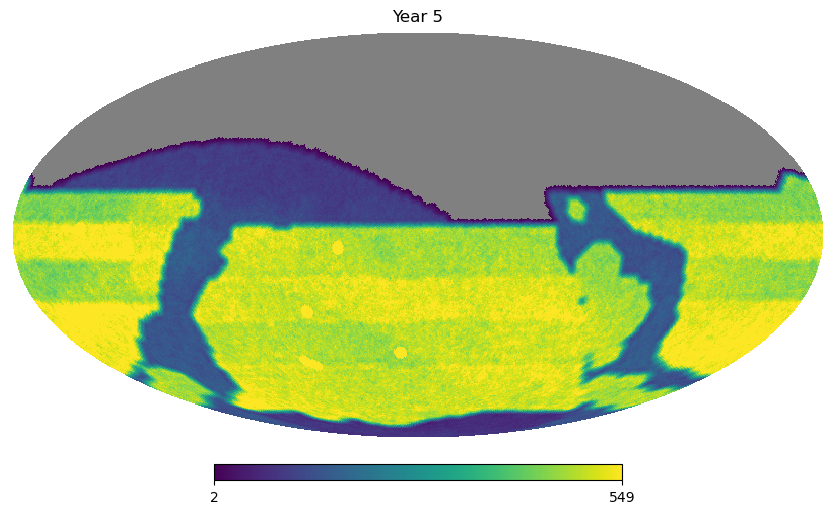

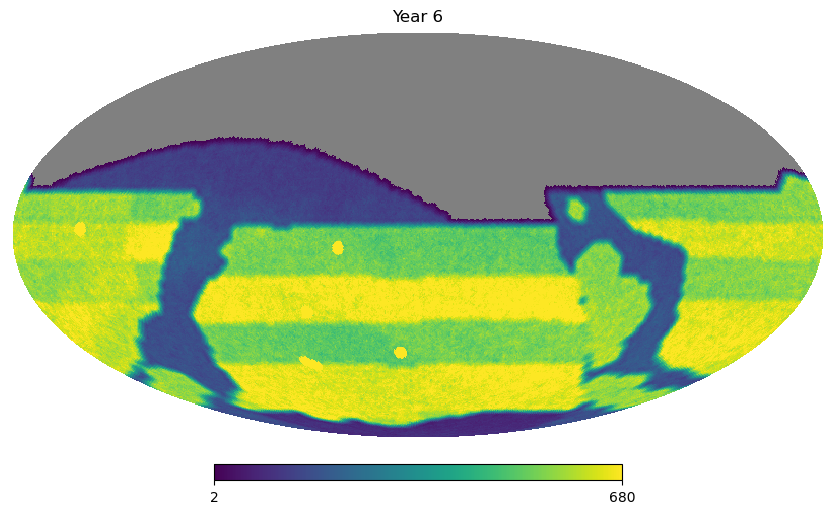

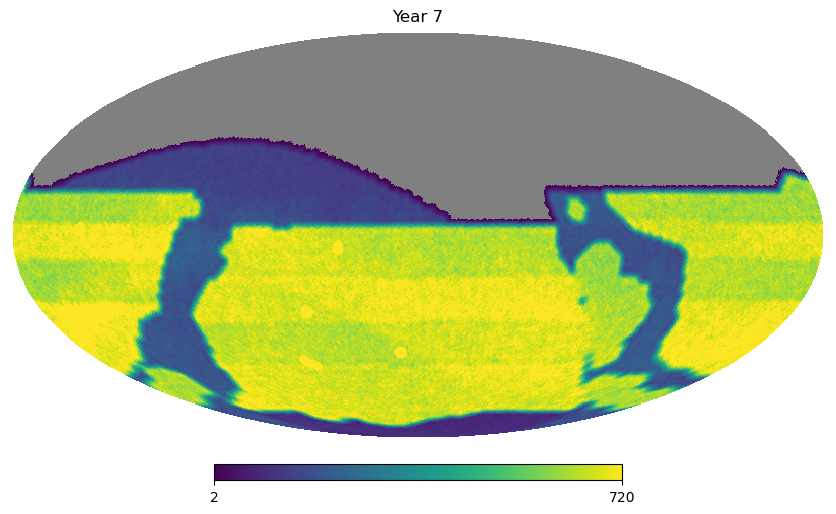

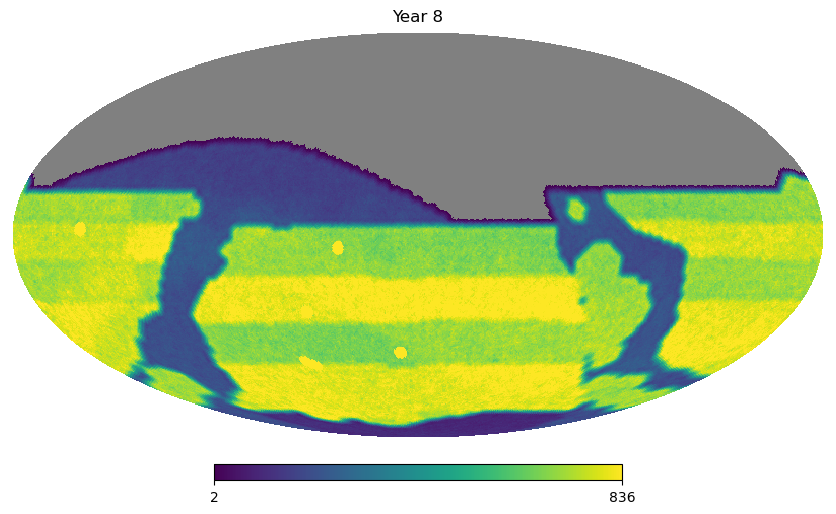

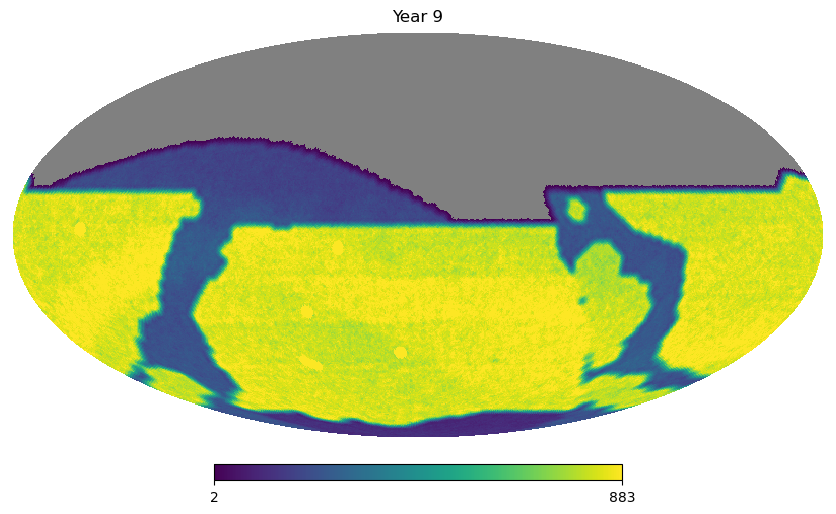

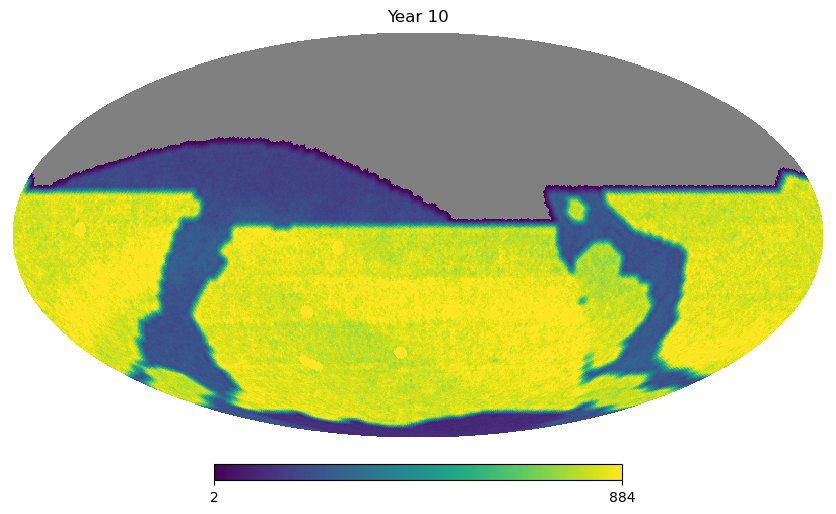

In [7]:
for year in np.arange(11):

    hp.mollview(mv[:,year], max=np.percentile(mv[:,year], 95), title="Year %i" % year)